# Business Understanding

## Project Domain

**Financial Technology / Fraud Detection**
Proyek ini bertujuan mengklasifikasikan apakah uang kertas asli atau palsu berdasarkan fitur statistik hasil scanning digital.

## Problem Statements

Peredaran uang palsu menjadi isu serius dalam sistem keuangan. Dibutuhkan sistem otomatis untuk mendeteksi keaslian uang secara cepat dan akurat.

## Goals

- Membangun model klasifikasi binary (asli/palsu)
- Menggunakan 4 fitur numerik
- Model ringan dan efisien, mudah untuk dikembangkan ke platform mobile
- Mengetahui apakah uang itu asli atau palsu

## Solution Statements

- Dataset: Banknote Authentication Dataset (Kaggle/UCI)
- Melakukan EDA dan preprocessing
- Membangun model ANN dan mengevaluasi akurasinya

# Data Understanding

## Import data dari kaggle

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"annisaazz88","key":"88392e7b1c924cf525a7d5e2bd88ee77"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download -d shantanuss/banknote-authentication-uci

Dataset URL: https://www.kaggle.com/datasets/shantanuss/banknote-authentication-uci
License(s): CC0-1.0
  0% 0.00/19.2k [00:00<?, ?B/s]
100% 19.2k/19.2k [00:00<00:00, 94.0MB/s]


In [4]:
!mkdir banknote-authentication-uci
!unzip banknote-authentication-uci.zip -d banknote-authentication-uci
!ls banknote-authentication-uci

Archive:  banknote-authentication-uci.zip
  inflating: banknote-authentication-uci/BankNoteAuthentication.csv  
BankNoteAuthentication.csv


## Import Library yang dibutuhkan

In [6]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models, layers

from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report

## Exploratory Data Analysis

In [7]:
df = pd.read_csv('banknote-authentication-uci.zip')
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


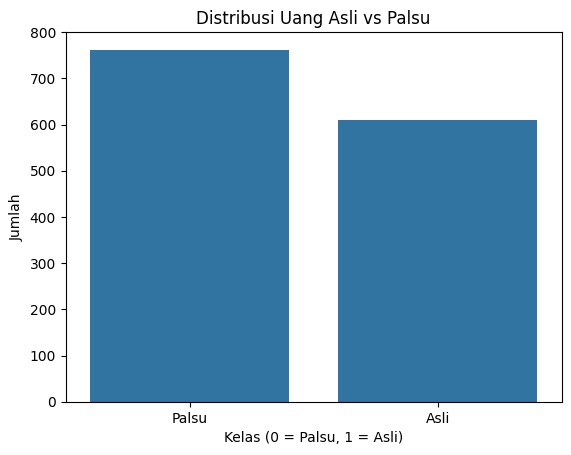

In [8]:
sns.countplot(x='class', data=df)
plt.title("Distribusi Uang Asli vs Palsu")
plt.xlabel("Kelas (0 = Palsu, 1 = Asli)")
plt.ylabel("Jumlah")
plt.xticks([0, 1], ['Palsu', 'Asli'])
plt.show()

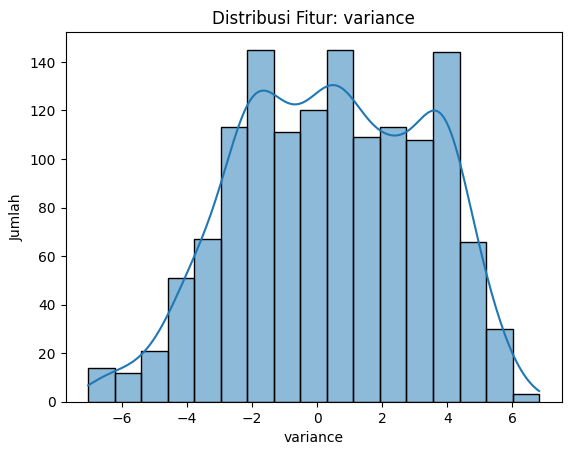

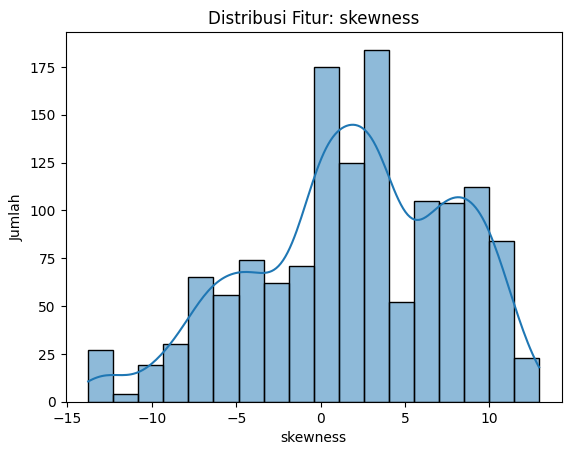

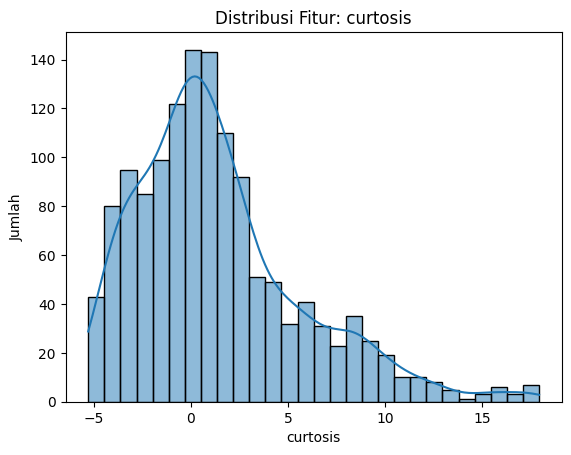

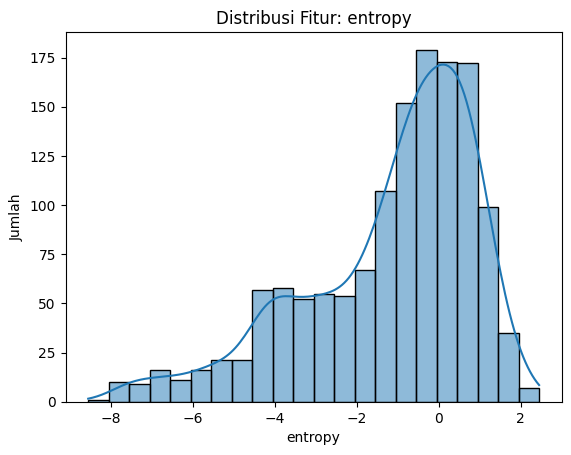

In [9]:
features = ['variance', 'skewness', 'curtosis', 'entropy']

for col in features:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribusi Fitur: {col}')
    plt.xlabel(col)
    plt.ylabel('Jumlah')
    plt.show()

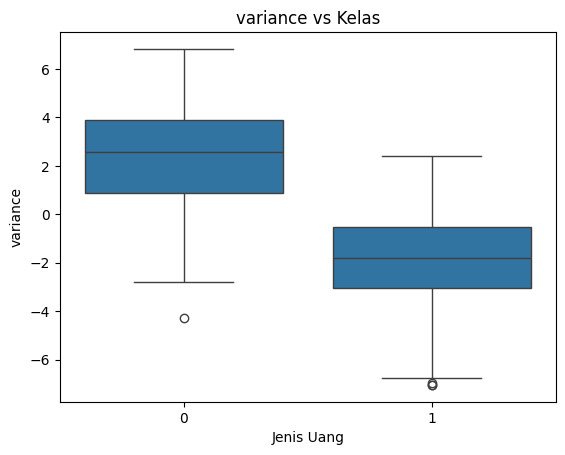

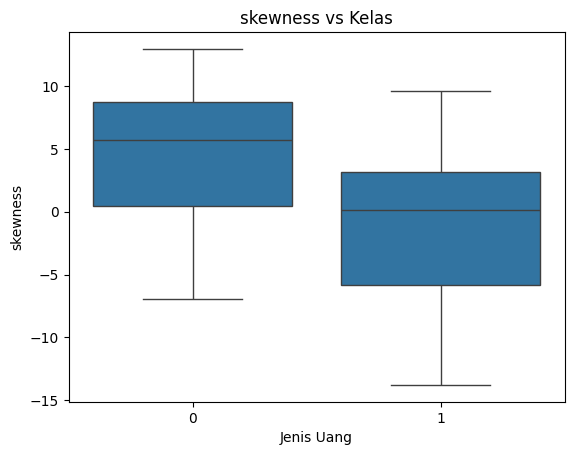

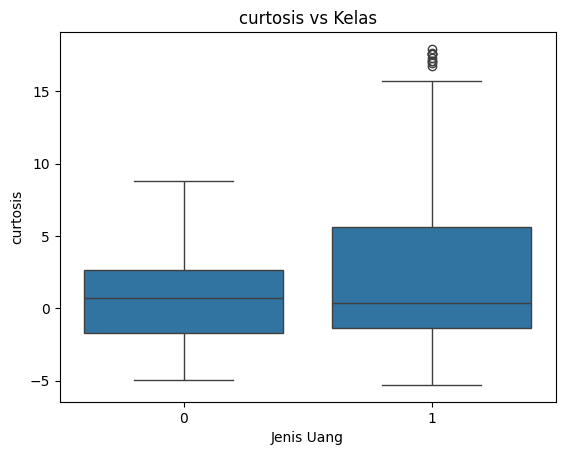

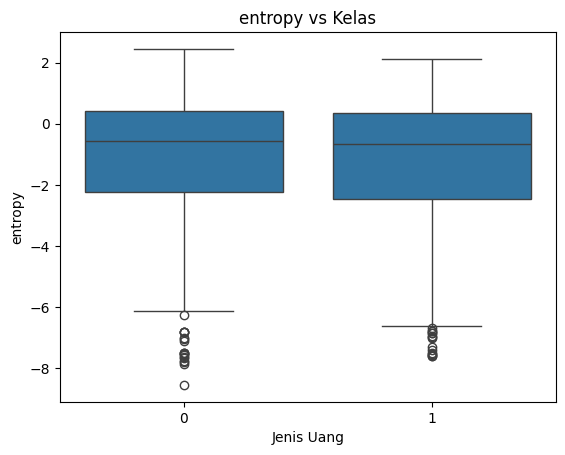

In [10]:
for col in features:
    sns.boxplot(x='class', y=col, data=df)
    plt.title(f'{col} vs Kelas')
    plt.xlabel('Jenis Uang')
    plt.ylabel(col)
    plt.show()

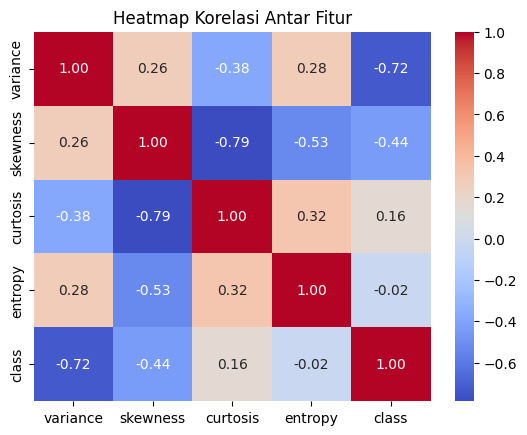

In [11]:
corr = df[features + ['class']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Antar Fitur')
plt.show()

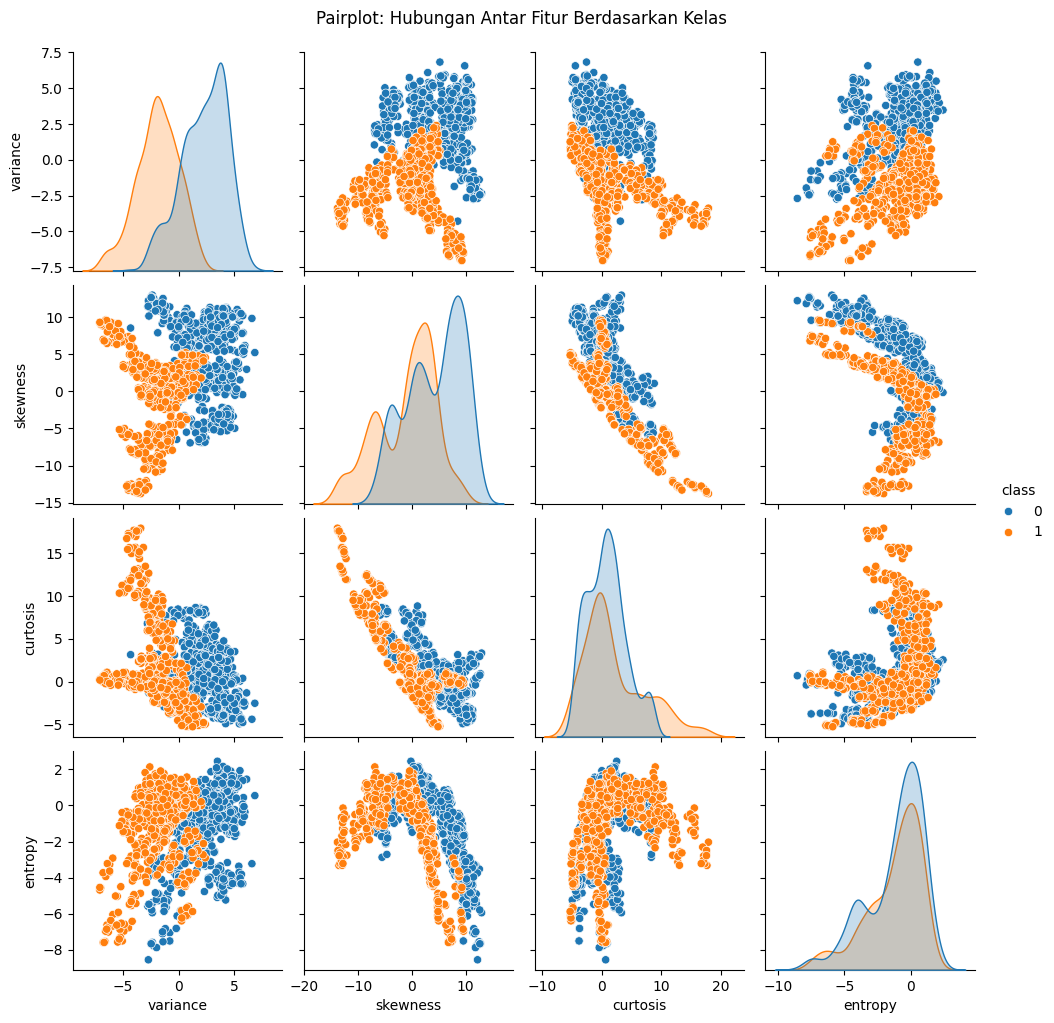

In [12]:
sns.pairplot(df, hue='class', vars=features)
plt.suptitle("Pairplot: Hubungan Antar Fitur Berdasarkan Kelas", y=1.02)
plt.show()

# Data Preparation

In [13]:
df['class'] = df['class'].map({0: 'Palsu', 1: 'Asli'})
X = df.drop(columns=['class'])
y = df['class']

y_encoded = pd.get_dummies(y).values

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42)


# Modeling

In [14]:
model = models.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(32, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(16, activation="relu"),
    layers.Dense(2, activation="softmax")
])


In [15]:
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 722 (2.82 KB)

 Trainable params: 722 (2.82 KB)

 Non-trainable params: 0 (0.00 B)

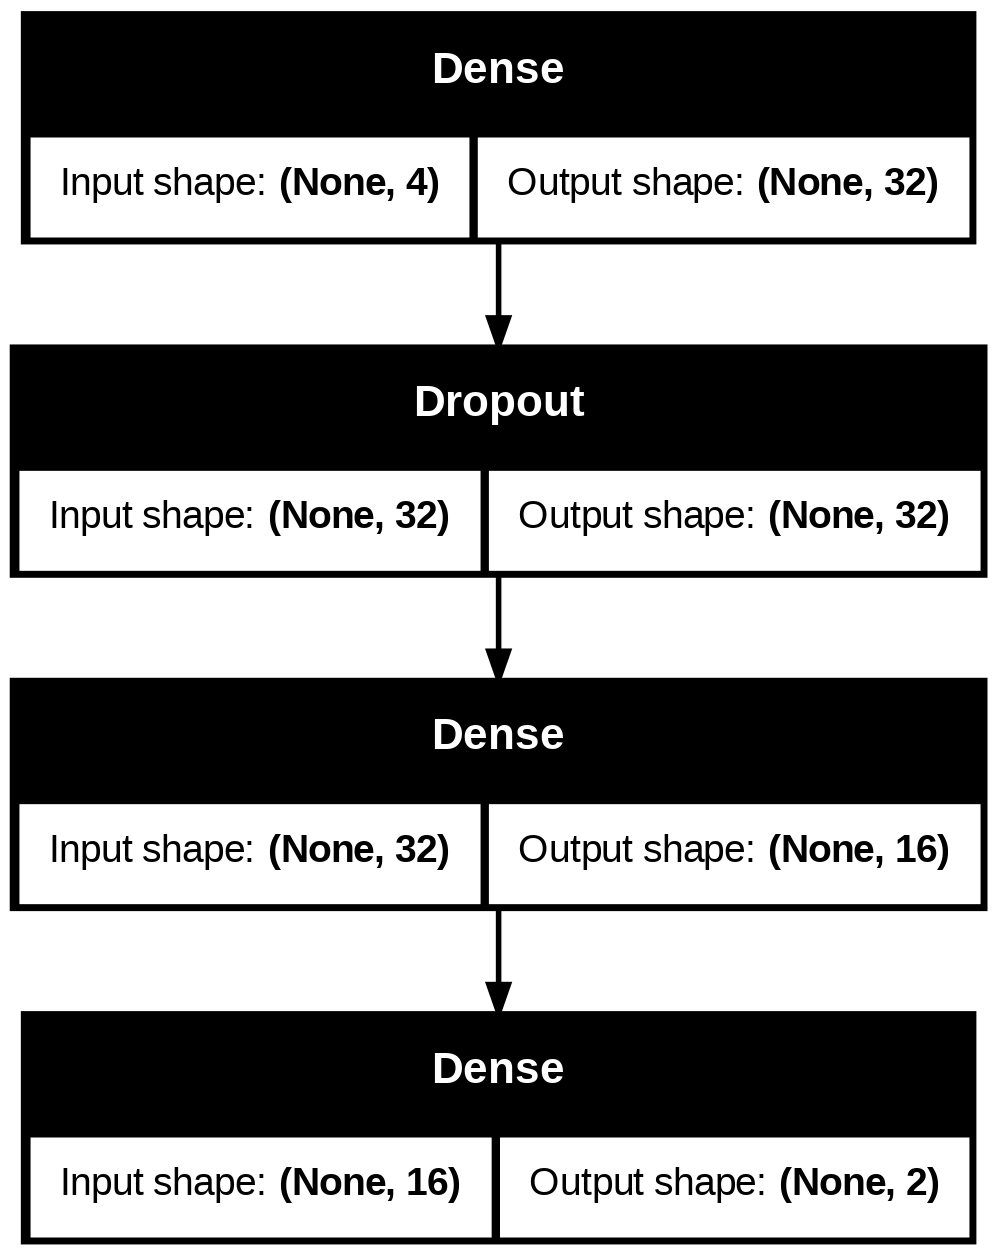

In [17]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes = True)

In [18]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)


In [19]:
history = model.fit(X_train, y_train,
                    epochs=15,                     # Boleh dinaikkan karena early stopping akan otomatis hentikan
                    batch_size=16,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stop])        # Tambahkan di sini


Epoch 1/15
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.5531 - loss: 0.6815 - val_accuracy: 0.5382 - val_loss: 0.6549
Epoch 2/15
69/69 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5870 - loss: 0.6402 - val_accuracy: 0.6764 - val_loss: 0.6068
Epoch 3/15
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7189 - loss: 0.5860 - val_accuracy: 0.7964 - val_loss: 0.5115
Epoch 4/15
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8095 - loss: 0.4892 - val_accuracy: 0.8582 - val_loss: 0.4140
Epoch 5/15
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8489 - loss: 0.3983 - val_accuracy: 0.8618 - val_loss: 0.3623
Epoch 6/15
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8806 - loss: 0.3361 - val_accuracy: 0.9055 - val_loss: 0.3098
Epoch 7/15
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9148 - loss: 0.2883 - val_accuracy: 0.9091 - val_loss: 0.2742
Epoch 8/15
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9238 - loss: 0.2348 - val_accuracy: 0.9200 - val_loss

# Evaluasi

In [20]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Akurasi: {accuracy:.4f}")
print(f"Loss: {loss:.4f}")

Akurasi: 0.9636
Loss: 0.1080


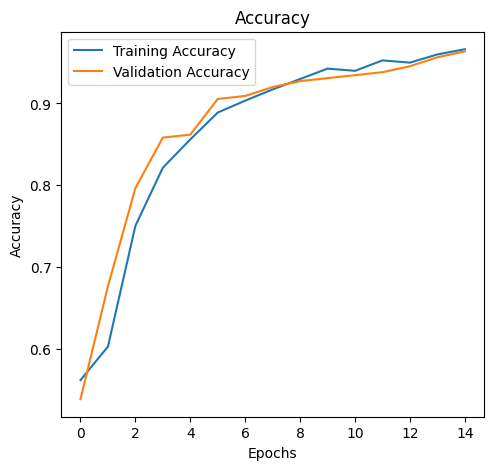

In [21]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label='Training Accuracy')
plt.plot(history.history["val_accuracy"], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

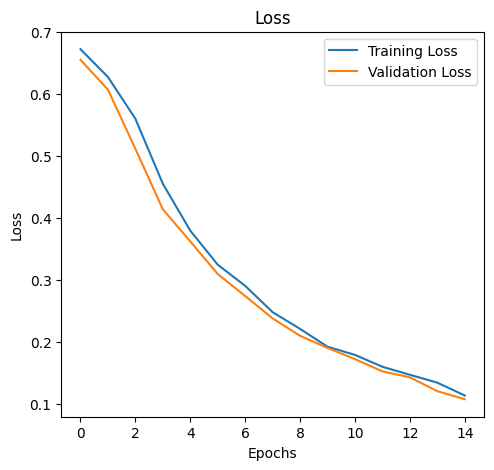

In [22]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label='Training Loss')
plt.plot(history.history["val_loss"], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step


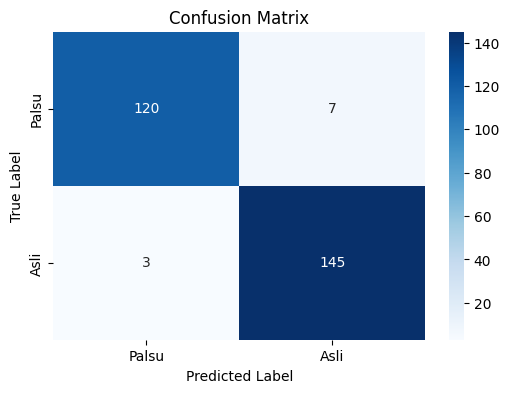

              precision    recall  f1-score   support

       Palsu       0.98      0.94      0.96       127
        Asli       0.95      0.98      0.97       148

    accuracy                           0.96       275
   macro avg       0.96      0.96      0.96       275
weighted avg       0.96      0.96      0.96       275



In [23]:
# Prediksi data uji
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Palsu", "Asli"], yticklabels=["Palsu", "Asli"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


# Laporan klasifikasi
print(classification_report(y_true, y_pred_classes, target_names=["Palsu", "Asli"]))

# Deployment

## Model Simulation

In [24]:
sample_input = np.array([[3.62160, 8.6661, -2.8073, -0.44699]])
sample_input_df = pd.DataFrame(sample_input)

In [25]:
sample_input_scaled = scaler.transform(sample_input_df)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [26]:
label_mapping = {0: "Palsu", 1: "Asli"}

# Prediksi dengan sigmoid (output 1 nilai antara 0–1)
prediction = model.predict(sample_input_scaled)[0][0]

# Ambil kelas akhir (dibulatkan)
predicted_class = int(np.round(prediction))

# Ubah ke string label
predicted_label = label_mapping[predicted_class]

print(f"Ini adalah uang: {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
Ini adalah uang: Palsu


## Save Model

In [27]:
model.save('./banknote.h5')

In [28]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

Saved artifact at '/tmp/tmpygvr9z_1'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 4), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)
Captures:
  135270453181904: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135270453181136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135270368430032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135270368431376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135270368430992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135270368431760: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [29]:
with open('banknote.tflite', 'wb') as f:
    f.write(tflite_model)

In [30]:
# Simpan label encoder dan scaler
import joblib
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']